# Libraries

In [66]:
import time
import pandas as pd
import numpy as np
import re

import json

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go

# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [67]:
colors = ["#4374B3", "#FF8C37"]
cmap = sns.color_palette(colors)
cmap
sns.set_palette(cmap)

# Import CSV

In [68]:
path = 'repository/data_prep/Original_Appendicitis.csv'
knn_path = 'repository/data_prep/KNN_Appendicitis.csv'
iter_path = 'repository/data_prep/IterativeImputer_Appendicitis.csv'
# ---
og_df = pd.read_csv(path)
knn_df_imputed = pd.read_csv(knn_path)
interative_df_imputed = pd.read_csv(iter_path)

In [69]:
df_dict = {'Original': og_df,'KNN': knn_df_imputed,'IterativeImputer':interative_df_imputed}

### Considering Imputer to impute in Main DataFrame
<u>Anwser</u> The **density** of **KNN Imputer** is the most **similarities** to the Original data.

In [70]:
df = knn_df_imputed.copy()

# Dimensionality reduction
## What is Dimensionality reduction?
the process of reducing the number of variables, features, or dimensions in a dataset while preserving as much relevant information as possible. It aims to overcome the curse of dimensionality. On the other hand called reducing the dimensionality of a dataset.
## Problem
- **Training Time**
- High number of features can suffer from **increased computational** complexity, **overfitting**.
## Solution
- Feature Selection
- Feature Extraction
- Principal Component Analysis (PCA)
- etc.
## Benefit 
- Improved computational efficiency
    - speed up the training and inference processes of machine learning algorithms
- Elimination of noise and redundancy
    - remove irrelevant or noisy features, leading to better generalization and more robust models. 
    
## Robust model
- Outlier resistance
    - less sensitive to outliers, provide more reliable and accurate results even in the presence of outliers.
- Noise tolerance
    - handle noisy data, which may contain random or irrelevant variations. so model can perform well on unseen or new data that it has not been trained on. 
## Methods
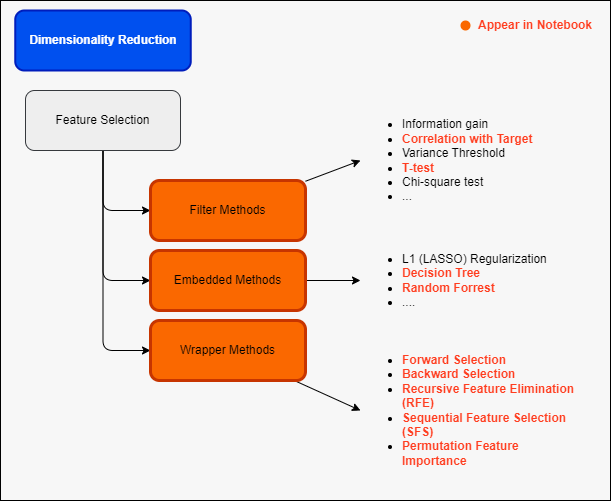

## Filter Method

### 1. Correlation with Target
- **0** to **1** = Positive relationship
- **0** = No relationship
- **0** to **-1** = Negative relationship

No relationship <u>means</u> no impact to **target**

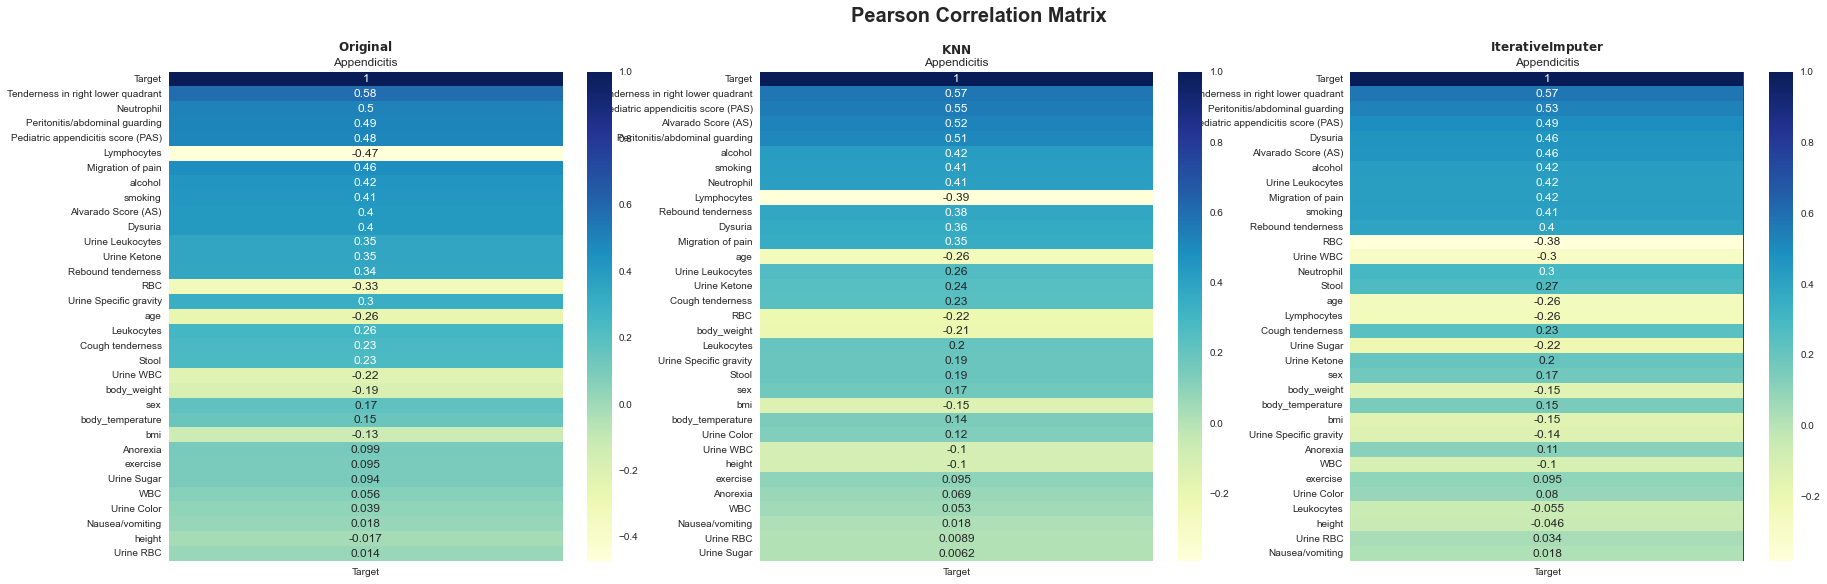

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(30, 9))
fig.suptitle('Pearson Correlation Matrix', fontsize=20, fontweight='bold')

index = 0
for name, df in df_dict.items():
    corr_matrix = df.corr()
    # Df section
    target_corr = corr_matrix['Target']
    other_corr = corr_matrix.drop('Target')['Target']
    corr_df = pd.DataFrame({'Target': target_corr})
    corr_df = corr_df.reindex(
        corr_df['Target'].abs().sort_values(ascending=False).index)
    # Graph Section
    axes[index].set_title(r'$\bf{' + name + '}$' +
                          f'\nAppendicitis')
    sns.heatmap(corr_df, cmap="YlGnBu", annot=True, ax=axes[index])
    plt.vlines(x=1, ymin=0, ymax=len(corr_df), colors='r', linewidth=2)
    index += 1
plt.show()

### 2. T-test
- **Obj**: calculate p-value with t-test on every features to identified as useful in appendicitis predicting
- **Outcome**: `Useful Features` , P-value can identify which features have a statistically significant impact on the target variable. 


#### Explanation
significantly (at level α = 0.05)
means 

**If** P-value of feature ≥ α 
-  Null hypothesis is true

**If** P-value of feature < α 
- Null hypothesis is false or should be rejected. (`Useful Features`)

 if the p-value of a feature is `less than` the `significance level`, it indicates that the feature is statistically significant and has a meaningful `impact` on the `target variable` in the classification model.

In [72]:
from scipy.stats import ttest_ind
dict_p_values = {'Original': '', 'KNN': '', 'IterativeImputer': ''}

# Loop through each feature column and calculate the t-test p-value
for name, df in df_dict.items():
    features = []
    p_value_s = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        group1 = df[df['Target'] == 0][col]
        group2 = df[df['Target'] == 1][col]
        t, p = ttest_ind(group1, group2)
        features.append(col)
        p_value_s.append(p)

    dict_pvalues = dict(zip(features, p_value_s))
    dict_p_values[name] = dict_pvalues


In [73]:
pavlue_df = pd.DataFrame(dict_p_values)
pavlue_df

,Original,KNN,IterativeImputer
age,2.102729e-09,2.102729e-09,2.102729e-09
sex,1.166636e-04,1.166636e-04,1.166636e-04
height,NaN,2.607240e-02,3.043270e-01
body_weight,NaN,2.118989e-06,6.746685e-04
bmi,NaN,9.027962e-04,9.372119e-04
body_temperature,NaN,1.841925e-03,7.741927e-04
alcohol,4.210680e-23,4.210680e-23,4.210680e-23
exercise,3.340211e-02,3.340211e-02,3.340211e-02
smoking,4.223045e-22,4.223045e-22,4.223045e-22
WBC,NaN,2.378614e-01,2.178069e-02


In [74]:
pavlue_df[pavlue_df.columns] = pavlue_df[pavlue_df.columns].apply(
    lambda x: round(x, 6))
pavlue_df


,Original,KNN,IterativeImputer
age,0.000000,0.000000,0.000000
sex,0.000117,0.000117,0.000117
height,NaN,0.026072,0.304327
body_weight,NaN,0.000002,0.000675
bmi,NaN,0.000903,0.000937
body_temperature,NaN,0.001842,0.000774
alcohol,0.000000,0.000000,0.000000
exercise,0.033402,0.033402,0.033402
smoking,0.000000,0.000000,0.000000
WBC,NaN,0.237861,0.021781


#### Useful features

In [162]:
threshold = 0.05
pavlue_df.loc[pavlue_df['KNN'] < threshold][['KNN']]

,KNN
age,0.000000
sex,0.000117
height,0.026072
body_weight,0.000002
bmi,0.000903
body_temperature,0.001842
alcohol,0.000000
exercise,0.033402
smoking,0.000000
RBC,0.000001



## Feature Selection
| Concept | Objective | Pros | Cons | Outcome |
| --- | --- | --- | --- | --- |
| Reducing the dimensionality of data and `focusing on` the most `influential features` | Enhance model performance and interpretability | Improved model accuracy / Reduced Overfitting / Faster Training / Enhanced Interpretability | Information Loss: Removed features may contain relevant patterns or interactions with other features | Selection of informative features |

### 1. Forward Selection
| Concept | Objective | Pros | Cons | Outcome |
| --- | --- | --- | --- | --- |
| Starting with a minimal feature set and adding features `1 feature` - `N feature` | Identify the most informative features | Improved model accuracy / Reduced Overfitting / Enhanced Interpretability | Computationally Intensive for Large Feature Sets / May overlook relevant interactions between features | Selection of informative features |

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, r2_score, log_loss, roc_curve, roc_auc_score

In [76]:
# Separate X,Y
X = df.drop(['Target'], axis=1)
y = df['Target']
# Splitting (Train:Test = 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### If the accuracy improved

In [77]:
performance_list = []
all_features = list(X.columns)
selected_features = []

best_accuracy = 0.0
for feature in all_features:
    model = LogisticRegression()
    # Reshape to 2D array
    selected_features.append(feature)
    X_train_feature = X_train.loc[:, selected_features]
    X_test_feature = X_test.loc[:, selected_features]  # Reshape to 2D array

    model.fit(X_train_feature, y_train)

    for subset, subset_name, y_true in [(X_train_feature, 'Train', y_train),
                                        (X_test_feature, 'Test', y_test)]:
        y_pred = model.predict(subset)
        # Performances
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc_score = roc_auc_score(y_true, y_pred)
        # Classification Report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_dict = json.loads(json.dumps(report))

        # Extract precision and recall from report_dict
        precision = report_dict['weighted avg']['precision']
        recall = report_dict['weighted avg']['recall']
        accuracy = report_dict['accuracy']
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        # Dict
        my_dict = {'Model': 'LogisticRegression', 'Feature': list(X_train_feature.columns), 'Performance': subset_name,
                   'AUC': auc_score, 'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
                   'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            performance_list.append(my_dict)
        else:
            if not selected_features:
                selected_features.pop()

performances = pd.DataFrame(performance_list)
performances


,Model,Feature,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
0,LogisticRegression,[age],Train,0.561333,45,107,43,205,0.601690,0.6250,0.6250
1,LogisticRegression,"[age, sex]",Train,0.566638,46,106,42,206,0.607995,0.6300,0.6300
2,LogisticRegression,"[age, sex, height]",Train,0.587649,53,99,43,205,0.627884,0.6450,0.6450
3,LogisticRegression,"[age, sex, height, body_weight]",Train,0.599533,56,96,42,206,0.640057,0.6550,0.6550
4,LogisticRegression,"[age, sex, height, body_weight, bmi]",Train,0.610675,60,92,43,205,0.649305,0.6625,0.6625
5,LogisticRegression,"[age, sex, height, body_weight, bmi, body_temp...",Train,0.611418,59,93,41,207,0.652000,0.6650,0.6650
6,LogisticRegression,"[age, sex, height, body_weight, bmi, body_temp...",Train,0.732598,94,58,38,210,0.756427,0.7600,0.7600
7,LogisticRegression,"[age, sex, height, body_weight, bmi, body_temp...",Train,0.796795,108,44,29,219,0.815836,0.8175,0.8175
8,LogisticRegression,"[age, sex, height, body_weight, bmi, body_temp...",Train,0.852398,120,32,21,227,0.866802,0.8675,0.8675
9,LogisticRegression,"[age, sex, height, body_weight, bmi, body_temp...",Train,0.858447,120,32,18,230,0.874710,0.8750,0.8750


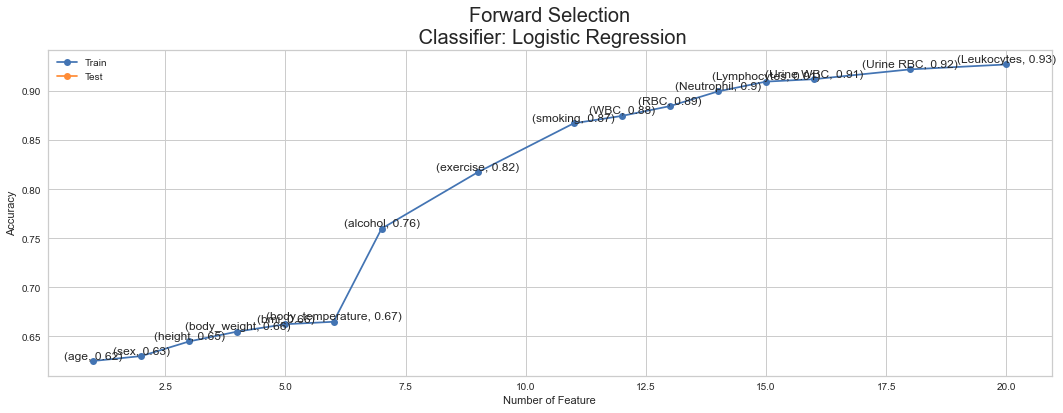

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

# Train
train_set_performances = performances.loc[performances['Performance'] == 'Train']
n_feature_train = train_set_performances['Feature'].apply(len)

# Test
test_set_performances = performances.loc[performances['Performance'] == 'Test']
n_feature_test = test_set_performances['Feature'].apply(len)

# Train Line
train_line, = plt.plot(
    n_feature_train, train_set_performances['Accuracy'], marker='o')

# Test Line
test_line, = plt.plot(
    n_feature_test, test_set_performances['Accuracy'], marker='o')

# Find Features
what_features = list(performances['Feature'])[-1]

# Add labels for markers in the train line
for x, a, z in zip(n_feature_train, train_set_performances['Accuracy'], what_features):
    plt.text(x, a, f'({z}, {round(a, 2)})', ha='center', va='bottom')

# Add labels for markers in the test line
for x, a,z in zip(n_feature_test, test_set_performances['Accuracy'], what_features):
    plt.text(x, a, f'({z}, {round(a, 2)})', ha='center', va='bottom')

# Set x-axis labels rotation
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Number of Feature')
plt.ylabel('Accuracy')
plt.title('Forward Selection\n Classifier: Logistic Regression', fontsize=20)

# Add legend
plt.legend([train_line, test_line], ['Train', 'Test'], loc='best')

# Show the plot
plt.show()


### 2. Backward Selection
| Concept | Objective | Pros | Cons | Outcome |
| --- | --- | --- | --- | --- |
| Starting with a `full feature` set and iteratively removing features | Identify the most informative features | Improved model accuracy / Reduced Overfitting / Enhanced Interpretability | Computationally Intensive for Large Feature Sets / May remove relevant features due to interdependencies | Selection of informative features |

In [79]:
performance_list = []
all_features = list(X.columns)
best_accuracy = 0.0

for feature in all_features:
    model = LogisticRegression()
    all_features.remove(feature)
    X_train_feature = X_train.loc[:, all_features]  # Reshape to 2D array
    X_test_feature = X_test.loc[:, all_features]  # Reshape to 2D array

    model.fit(X_train_feature, y_train)

    for subset, subset_name, y_true in [(X_train_feature, 'Train', y_train),
                                        (X_test_feature, 'Test', y_test)]:
        y_pred = model.predict(subset)
        # Performances
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc_score = roc_auc_score(y_true, y_pred)
        # Classification Report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_dict = json.loads(json.dumps(report))

        # Extract precision and recall from report_dict
        precision = report_dict['weighted avg']['precision']
        recall = report_dict['weighted avg']['recall']
        accuracy = report_dict['accuracy']
        # Confusion Matrix
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        # Dict
        my_dict = {'Model': 'LogisticRegression', 'Feature': list(X_train_feature.columns), 'Performance': subset_name,
                   'AUC': auc_score, 'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
                   'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
 
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            performance_list.append(my_dict)
        else:
            if not all_features:
                all_features.pop()
    
performances = pd.DataFrame(performance_list)
performances


,Model,Feature,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
0,LogisticRegression,"[sex, height, body_weight, bmi, body_temperatu...",Train,0.458616,29,19,35,17,0.482857,0.4250,0.4250
1,LogisticRegression,"[sex, height, body_weight, bmi, body_temperatu...",Test,0.465545,29,19,35,17,0.463056,0.4600,0.4600
2,LogisticRegression,"[sex, body_weight, body_temperature, exercise,...",Train,0.947687,29,19,35,17,0.952426,0.9525,0.9525


#### Removed un-impact features
**un-impact** means the model's performance doesn't improve when put the feature in the model

In [80]:
list(performances['Feature'])[-1]

['sex',
 'body_weight',
 'body_temperature',
 'exercise',
 'WBC',
 'Neutrophil',
 'Urine WBC',
 'Leukocytes',
 'Urine Color',
 'Urine Leukocytes',
 'Peritonitis/abdominal guarding',
 'Migration of pain',
 'Tenderness in right lower quadrant',
 'Rebound tenderness',
 'Cough tenderness',
 'Nausea/vomiting',
 'Anorexia',
 'Dysuria',
 'Stool',
 'Alvarado Score (AS)',
 'Pediatric appendicitis score (PAS)']

### 3. Recursive Feature Elimination (RFE) 
| Concept | Objective | Pros | Cons | Outcome |
| --- | --- | --- | --- | --- |
| Starting with all features and recursively eliminating the `least important features` | Identify the most informative features | Improved model accuracy / Reduced Overfitting / Enhanced Interpretability | Information Loss: Eliminated features may contain relevant information / Computationally Intensive for Large Datasets | Ranking of informative feature |

In [81]:
from sklearn.feature_selection import RFE

In [82]:
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X, y)
selected_features = rfe.support_
feature_ranking = rfe.ranking_

In [83]:
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})
ranking_df.sort_values('Ranking')

,Feature,Ranking
20,Urine Specific gravity,1
2,height,1
3,body_weight,1
5,body_temperature,1
11,Neutrophil,1
4,bmi,2
12,Lymphocytes,3
0,age,4
31,Pediatric appendicitis score (PAS),5
30,Alvarado Score (AS),6


### 4. Sequential Forward Selection
| Concept | Objective | Pros | Cons | Outcome |
| --- | --- | --- | --- | --- |
| Iteratively adding features to the `informative feature` subset | Improve model accuracy and performance | Improved model accuracy, reduced overfitting, faster training, enhanced interpretability | May not find the optimal feature subset, sensitive to the order of feature addition | Selected features in the order of addition |

## Library 

In [84]:
from sklearn.feature_selection import SequentialFeatureSelector

In [85]:
lr = LogisticRegression()
sfs = SequentialFeatureSelector(
    estimator=lr, n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

In [86]:
list(selected_feature_indices)

[10, 13, 23, 28, 31]

In [87]:
list(selected_feature_names)


['RBC',
 'Urine WBC',
 'Tenderness in right lower quadrant',
 'Dysuria',
 'Pediatric appendicitis score (PAS)']

# Modeling and Evaluation

## Library 

In [88]:
# Used to save a trained model variable
import joblib
# Split Train, Test
from sklearn.model_selection import train_test_split
# Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# New Classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# Metric
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from yellowbrick.classifier import ConfusionMatrix
# Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


## Pipeline 
**Obj**: handle data preprocessing, transformation, and feature engineering tasks. 

In [89]:
# Directory operations
import os 

#### autoreload
**Obj**: reload all modules every time before executing the Python code typed.
read more: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

In [90]:
%load_ext autoreload
%autoreload 2

from configuration.Pipeline import Pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
# Import raw data
path = 'repository/data_sources/Appendicitis.csv'
raw_df = pd.read_csv(path)

#### Process in Pipeline
- contains:
    - Data cleaning
        - Z-test 
    - Feature Engineering
        - Create 11 conditions or 11 features with Regular Expression
    - Encoding
        - Binary encoding 
        - Ordinal encoding 
    - Imputation
        - KNN

In [92]:
pipe = Pipeline(raw_df)

In [93]:
df_prep = pipe.preprocessing(raw_df)

In [94]:
df_prep

,age,sex,height,body_weight,bmi,body_temperature,alcohol,exercise,smoking,WBC,...,Migration of pain,Tenderness in right lower quadrant,Rebound tenderness,Cough tenderness,Nausea/vomiting,Anorexia,Dysuria,Stool,Alvarado Score (AS),Pediatric appendicitis score (PAS)
0,12.0,0.0,154.000000,39.0,25.749667,36.600000,1.0,1.0,1.0,15.636667,...,2,1,1,2,2,2,1,2,6,7
1,37.0,1.0,163.333333,59.0,27.255333,36.500000,1.0,1.0,1.0,8.550000,...,2,1,1,2,2,2,2,2,3,5
2,28.0,1.0,173.666667,63.0,25.467333,37.100000,1.0,1.0,1.0,8.915943,...,2,2,2,1,2,2,1,2,7,8
3,36.0,1.0,161.000000,43.0,16.589000,36.466667,1.0,1.0,1.0,7.919870,...,2,1,1,2,2,2,2,2,3,5
4,19.0,1.0,165.000000,46.0,16.896000,37.100000,1.0,1.0,1.0,9.324210,...,2,2,2,2,2,2,2,2,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,25.0,1.0,177.000000,69.0,36.707000,39.700000,0.0,1.0,0.0,16.830000,...,1,1,1,2,2,1,1,2,6,7
496,30.0,0.0,155.000000,55.0,22.893000,37.000000,1.0,1.0,1.0,13.873333,...,2,1,1,2,2,2,2,2,6,7
497,26.0,0.0,155.000000,64.4,26.805000,37.300000,1.0,1.0,0.0,9.866667,...,1,1,2,1,2,2,2,1,4,4
498,19.0,1.0,154.333333,74.0,20.499000,36.800000,0.0,1.0,0.0,11.400000,...,2,1,1,2,2,2,1,1,5,6


<AxesSubplot: >

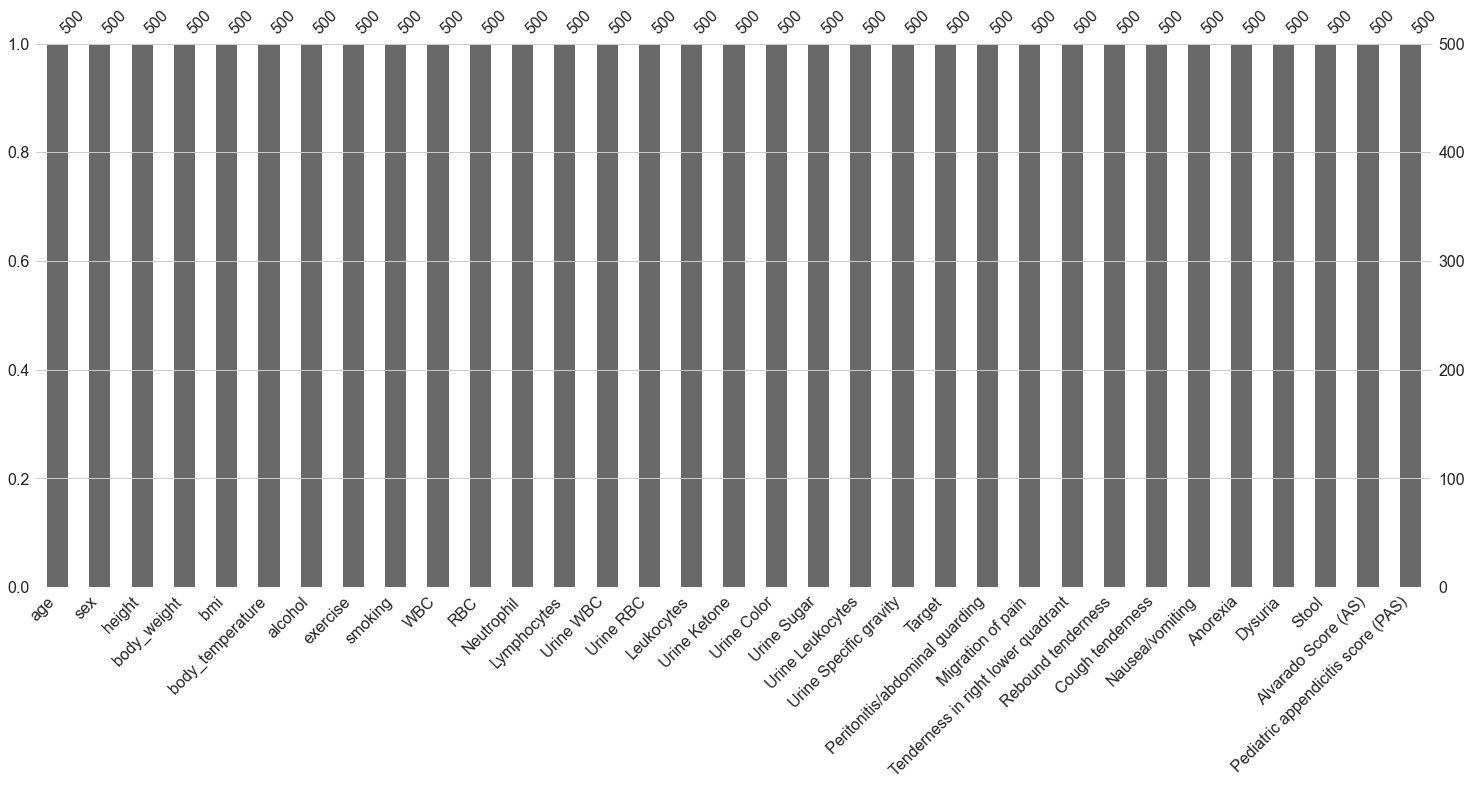

In [95]:
msno.bar(df_prep)

In [96]:
df_prep.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,500.0,22.90,9.96,0.00,16.00,23.00,31.00,40.00
sex,500.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00
height,500.0,158.22,12.36,128.00,152.00,160.00,167.00,189.00
body_weight,500.0,59.36,13.46,31.00,49.23,57.10,67.00,102.00
bmi,500.0,23.05,5.21,11.85,19.14,22.48,25.86,39.68
body_temperature,500.0,36.96,0.79,35.10,36.50,36.80,37.20,40.00
alcohol,500.0,0.72,0.45,0.00,0.00,1.00,1.00,1.00
exercise,500.0,0.99,0.08,0.00,1.00,1.00,1.00,1.00
smoking,500.0,0.71,0.45,0.00,0.00,1.00,1.00,1.00
WBC,500.0,10.04,4.12,0.01,7.61,9.98,12.77,27.50


## Function for Modeling
**Obj**: Easy to Train and Easy to use

In [115]:
def modeling(models, X_train, X_test, y_train, y_test):
    l_performances = []

    for name, model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        for subset, subset_name, y_true in [(X_train, 'Train', y_train),
                                            (X_test, 'Test', y_test)]:
            y_pred = model.predict(subset)
            # Calculate ROC curve and AUC score
            fpr, tpr, thresholds = roc_curve(y_true, y_pred)
            auc_score = roc_auc_score(y_true, y_pred)
            # Classification Report
            report = classification_report(y_true, y_pred, output_dict=True)
            report_dict = json.loads(json.dumps(report))

            # Extract precision and recall from report_dict
            precision = report_dict['weighted avg']['precision']
            recall = report_dict['weighted avg']['recall']
            accuracy = report_dict['accuracy']

            # Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            TP = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TN = cm[1][1]
            runtime = format(round((time.time() - start_time)/60, 2))
            # Dict
            my_dict = {'Model': name, 'Runtime': runtime, 'Performance': subset_name,
                       'AUC': auc_score, 'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
                       'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

            l_performances.append(my_dict)

    performances = pd.DataFrame(l_performances)
    return performances

## Split X, Y

In [98]:
X = df_prep.drop('Target', axis=1)
y = df_prep['Target']

In [99]:
X

,age,sex,height,body_weight,bmi,body_temperature,alcohol,exercise,smoking,WBC,...,Migration of pain,Tenderness in right lower quadrant,Rebound tenderness,Cough tenderness,Nausea/vomiting,Anorexia,Dysuria,Stool,Alvarado Score (AS),Pediatric appendicitis score (PAS)
0,12.0,0.0,154.000000,39.0,25.749667,36.600000,1.0,1.0,1.0,15.636667,...,2,1,1,2,2,2,1,2,6,7
1,37.0,1.0,163.333333,59.0,27.255333,36.500000,1.0,1.0,1.0,8.550000,...,2,1,1,2,2,2,2,2,3,5
2,28.0,1.0,173.666667,63.0,25.467333,37.100000,1.0,1.0,1.0,8.915943,...,2,2,2,1,2,2,1,2,7,8
3,36.0,1.0,161.000000,43.0,16.589000,36.466667,1.0,1.0,1.0,7.919870,...,2,1,1,2,2,2,2,2,3,5
4,19.0,1.0,165.000000,46.0,16.896000,37.100000,1.0,1.0,1.0,9.324210,...,2,2,2,2,2,2,2,2,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,25.0,1.0,177.000000,69.0,36.707000,39.700000,0.0,1.0,0.0,16.830000,...,1,1,1,2,2,1,1,2,6,7
496,30.0,0.0,155.000000,55.0,22.893000,37.000000,1.0,1.0,1.0,13.873333,...,2,1,1,2,2,2,2,2,6,7
497,26.0,0.0,155.000000,64.4,26.805000,37.300000,1.0,1.0,0.0,9.866667,...,1,1,2,1,2,2,2,1,4,4
498,19.0,1.0,154.333333,74.0,20.499000,36.800000,0.0,1.0,0.0,11.400000,...,2,1,1,2,2,2,1,1,5,6


In [100]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: Target, Length: 500, dtype: float64

## Problem: Class Imbalance

<AxesSubplot: title={'center': 'Count of the target\n0 = No disease, 1 = Disease'}, xlabel='Target', ylabel='count'>

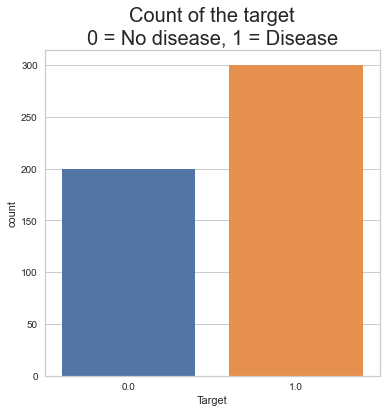

In [101]:
# Dataset with Class Imbalance
plt.figure(figsize=(6, 6))
plt.title('Count of the target\n0 = No disease, 1 = Disease', size=20)
sns.countplot(x="Target", data=df_prep)

## SMOTE 
| **Concept** | **Objective** | **Problem** | **Solve** |
| --- | --- | --- | --- |
| SMOTE (Synthetic Minority `Over-sampling` Technique) | To address `class imbalance` in machine learning datasets by increasing the representation of the minority class through synthetic samples | Class imbalance can lead to biased models with poor performance on the minority class | Generate synthetic samples by interpolating between feature vectors of minority class instances |
| **Pros** | **Cons** | **Outcome** |  |
| `Balances` `class` distribution and `improves` model `performance` / Reduces bias towards majority class / Preserves the original information of minority class | May introduce synthetic samples that are similar to existing ones, leading to overfitting / Computationally expensive for large datasets | Improved classification performance on the minority class by creating a more balanced dataset, leading to better model generalization and increased accuracy |  |


### Library 

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
oversample = SMOTE(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

### Result 

In [104]:
y.value_counts()

1.0    300
0.0    200
Name: Target, dtype: int64

In [105]:
y_resampled.value_counts()

1.0    300
0.0    300
Name: Target, dtype: int64

### After performing SMOTE oversampling, Will the correlation change?
#### <u>Prove</u>

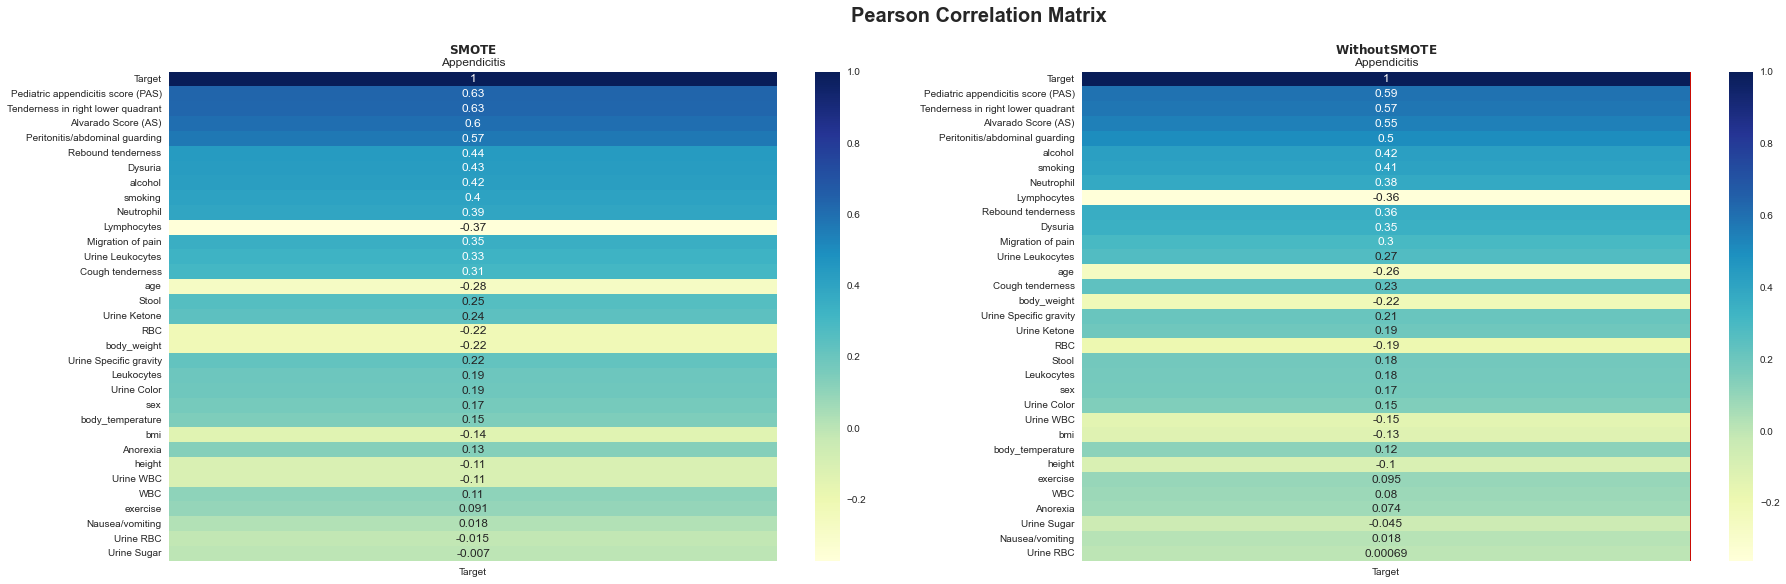

In [106]:
compare_dict ={'SMOTE':pd.concat([X_resampled, y_resampled], axis=1), 'Without SMOTE':pd.concat([X, y], axis=1)}

fig, axes = plt.subplots(1, 2, figsize=(30, 9))
fig.suptitle('Pearson Correlation Matrix', fontsize=20, fontweight='bold')

index = 0
for name, df in compare_dict.items():
    corr_matrix = df.corr()
    # Df section
    target_corr = corr_matrix['Target']
    other_corr = corr_matrix.drop('Target')['Target']
    corr_df = pd.DataFrame({'Target': target_corr})
    corr_df = corr_df.reindex(
        corr_df['Target'].abs().sort_values(ascending=False).index)
    # Graph Section

    axes[index].set_title(r'$\bf{' + name + '}$' +
                          f'\nAppendicitis')
    sns.heatmap(corr_df, cmap="YlGnBu", annot=True, ax=axes[index])
    plt.vlines(x=1, ymin=0, ymax=len(corr_df), colors='r', linewidth=2)
    index += 1
plt.show()

<u>**Answer**</u> No
after SMOTE the correlation remain relatively unchanged.

<u>**means**</u> after SMOTE synthetic samples are similar to existing minority class instances

## Splitting and Fitting
### Hold-out

how it works:

Split data into 3 segments
1.   1st segment called "Train" is used for fitting model
2.   2rd segment called "Test or held-out" is used as an unseen data for model evaluation
3.   3nd segment called "Val or Dev" is used as an Test to confirm 
### Ratio (80:20)
![train_test.png](attachment:train_test.png)

In [107]:
# Train : Test : Valid = 80:20

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    random_state=42,
                                                    test_size=0.2)

In [108]:
# This is how to split into 3 segments
# Train : Test : Valid = 80:20
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
#                                                     random_state=42,
#                                                     test_size=0.2)
# Train : Test : Valid = 80:10:10
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42,
#                                                 test_size=0.5)

In [109]:
len(X_train)

480

In [110]:
len(X_test)

120

## Training SMOTE vs Without SMOTE

### SMOTE

In [116]:
%%time
rf = RandomForestClassifier()
lr = LogisticRegression()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
gnb = GaussianNB()
lgbmc = LGBMClassifier()
xgbc = XGBClassifier()
knc = KNeighborsClassifier(3)
dtc = DecisionTreeClassifier()
dummyc = DummyClassifier(strategy='most_frequent', random_state=0)

models = [('Random Forest', rf), ('Logistic Regression', lr),
          ('Gradient Boosting Classifier', gbc),
          ('AdaBoostClassifier', abc), ('GaussianNB', gnb), 
          ('LGBMClassifier', lgbmc), ('XGBClassifier', xgbc), 
          ('KNeighborsClassifier', knc), ('DecisionTreeClassifier', dtc), 
          ('DummyClassifier_most_frequent', dummyc)]
          
smote_performances = modeling(
    models, X_train, X_test, y_train, y_test)
smote_performances

CPU times: total: 4.11 s
Wall time: 1.12 s


,Model,Runtime,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
0,Random Forest,0.0,Train,1.000000,242,0,0,238,1.000000,1.000000,1.000000
1,Random Forest,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
2,Logistic Regression,0.0,Train,0.937426,229,13,17,221,0.937613,0.937500,0.937500
3,Logistic Regression,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
4,Gradient Boosting Classifier,0.0,Train,1.000000,242,0,0,238,1.000000,1.000000,1.000000
5,Gradient Boosting Classifier,0.0,Test,0.916574,53,5,5,57,0.916667,0.916667,0.916667
6,AdaBoostClassifier,0.0,Train,0.968730,235,7,8,230,0.968757,0.968750,0.968750
7,AdaBoostClassifier,0.0,Test,0.900445,53,5,7,55,0.900556,0.900000,0.900000
8,GaussianNB,0.0,Train,0.869140,199,43,20,218,0.872268,0.868750,0.868750
9,GaussianNB,0.0,Test,0.864850,47,11,5,57,0.869947,0.866667,0.866667


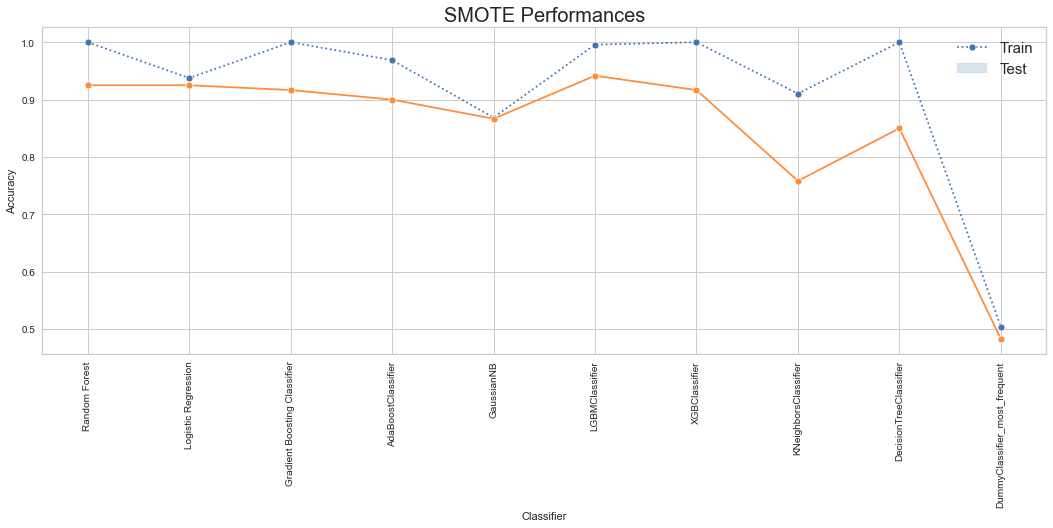

In [117]:
# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

# Train
train_ = smote_performances.loc[smote_performances['Performance'] == 'Train'][[
    'Model', 'Accuracy']]

# Test
test_ = smote_performances.loc[smote_performances['Performance'] == 'Test'][[
    'Model', 'Accuracy']]

# Calculate mean and standard deviation
train_mean = np.mean(train_['Accuracy'])
train_std = np.std(train_['Accuracy'])

test_mean = np.mean(test_['Accuracy'])
test_std = np.std(test_['Accuracy'])

# Train Line
sns.lineplot(data=train_, x='Model', y='Accuracy',
             marker='o', linestyle='dotted')

# Test Line
sns.lineplot(data=test_, x='Model', y='Accuracy', marker='o')

# Set x-axis labels rotation
plt.xticks(rotation=90)

# Add labels and title
plt.legend(['Train', 'Test'], loc='best', fontsize=15)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('SMOTE Performances', fontsize=20)

# Show the plot
plt.show()


### Without SMOTE

In [118]:
# Train : Test : Valid = 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.2)

In [119]:
%%time
rf = RandomForestClassifier()
lr = LogisticRegression()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
gnb = GaussianNB()
lgbmc = LGBMClassifier()
xgbc = XGBClassifier()
knc = KNeighborsClassifier(3)
dtc = DecisionTreeClassifier()
dummyc = DummyClassifier(strategy='most_frequent', random_state=0)

models = [('Random Forest', rf), ('Logistic Regression', lr),
          ('Gradient Boosting Classifier', gbc),
          ('AdaBoostClassifier', abc), ('GaussianNB', gnb), 
          ('LGBMClassifier', lgbmc), ('XGBClassifier', xgbc), 
          ('KNeighborsClassifier', knc), ('DecisionTreeClassifier', dtc), 
          ('DummyClassifier_most_frequent', dummyc)]
without_smote_performances = modeling(
    models, X_train, X_test, y_train, y_test)
without_smote_performances


CPU times: total: 3.12 s
Wall time: 1.03 s


,Model,Runtime,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
0,Random Forest,0.0,Train,1.000000,152,0,0,248,1.000000,1.0000,1.0000
1,Random Forest,0.0,Test,0.918269,42,6,2,50,0.922468,0.9200,0.9200
2,Logistic Regression,0.0,Train,0.901210,133,19,18,230,0.907393,0.9075,0.9075
3,Logistic Regression,0.0,Test,0.908654,42,6,3,49,0.911273,0.9100,0.9100
4,Gradient Boosting Classifier,0.0,Train,1.000000,152,0,0,248,1.000000,1.0000,1.0000
5,Gradient Boosting Classifier,0.0,Test,0.918269,42,6,2,50,0.922468,0.9200,0.9200
6,AdaBoostClassifier,0.0,Train,0.970183,146,6,5,243,0.972477,0.9725,0.9725
7,AdaBoostClassifier,0.0,Test,0.856571,37,11,3,49,0.868667,0.8600,0.8600
8,GaussianNB,0.0,Train,0.810908,108,44,22,226,0.834655,0.8350,0.8350
9,GaussianNB,0.0,Test,0.804487,32,16,3,49,0.830857,0.8100,0.8100


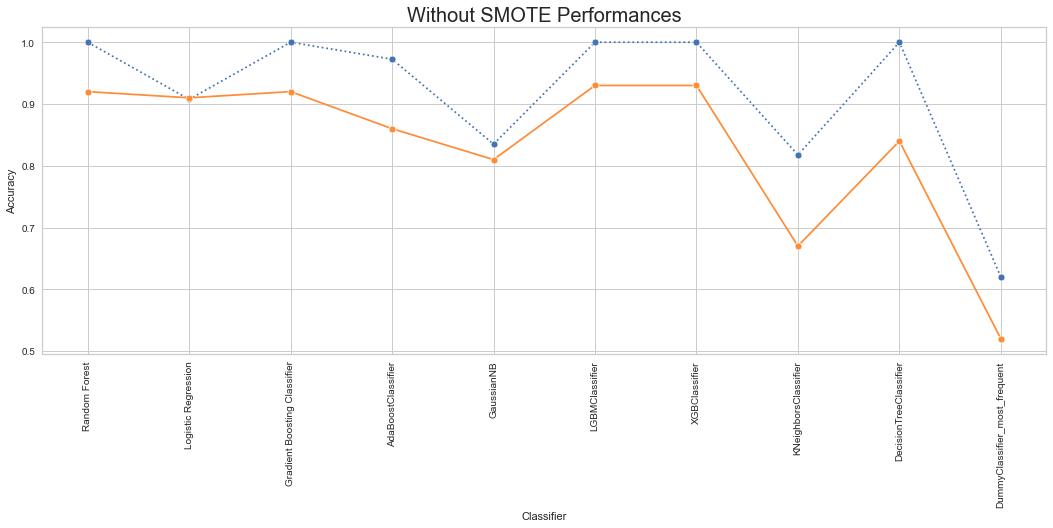

In [164]:
# Set the figure size
plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

# Train
train_ = without_smote_performances.loc[without_smote_performances['Performance'] == 'Train'][[
    'Model', 'Accuracy']]

# Test
test_ = without_smote_performances.loc[without_smote_performances['Performance'] == 'Test'][[
    'Model', 'Accuracy']]

# Calculate mean and standard deviation
train_mean = np.mean(train_['Accuracy'])
train_std = np.std(train_['Accuracy'])

test_mean = np.mean(test_['Accuracy'])
test_std = np.std(test_['Accuracy'])

# Train Line
train_line = sns.lineplot(data=train_, x='Model', y='Accuracy',
             marker='o', linestyle='dotted')

# Test Line
test_line = sns.lineplot(data=test_, x='Model', y='Accuracy', marker='o')

# Set x-axis labels rotation
plt.xticks(rotation=90)

# Add labels and title
plt.legend([train_line, test_line], ['Train', 'Test'], loc='best', fontsize=15)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Without SMOTE Performances', fontsize=20)

# Show the plot
plt.show()


### Comparison

In [121]:
smote_performances.loc[smote_performances['Performance']
                       == 'Test'].sort_values(by='Accuracy',ascending=False)

,Model,Runtime,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
11,LGBMClassifier,0.0,Test,0.941324,54,4,3,59,0.941757,0.941667,0.941667
1,Random Forest,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
3,Logistic Regression,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
5,Gradient Boosting Classifier,0.0,Test,0.916574,53,5,5,57,0.916667,0.916667,0.916667
13,XGBClassifier,0.0,Test,0.916574,53,5,5,57,0.916667,0.916667,0.916667
7,AdaBoostClassifier,0.0,Test,0.900445,53,5,7,55,0.900556,0.900000,0.900000
9,GaussianNB,0.0,Test,0.864850,47,11,5,57,0.869947,0.866667,0.866667
17,DecisionTreeClassifier,0.0,Test,0.847608,45,13,5,57,0.855714,0.850000,0.850000
15,KNeighborsClassifier,0.0,Test,0.761123,49,9,20,42,0.768727,0.758333,0.758333
19,DummyClassifier_most_frequent,0.0,Test,0.500000,58,0,62,0,0.233611,0.483333,0.483333


In [122]:
without_smote_performances.loc[without_smote_performances['Performance']
                       == 'Test'].sort_values(by='Accuracy',ascending=False)

,Model,Runtime,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
11,LGBMClassifier,0.0,Test,0.928686,43,5,2,50,0.931394,0.93,0.93
13,XGBClassifier,0.0,Test,0.928686,43,5,2,50,0.931394,0.93,0.93
1,Random Forest,0.0,Test,0.918269,42,6,2,50,0.922468,0.92,0.92
5,Gradient Boosting Classifier,0.0,Test,0.918269,42,6,2,50,0.922468,0.92,0.92
3,Logistic Regression,0.0,Test,0.908654,42,6,3,49,0.911273,0.91,0.91
7,AdaBoostClassifier,0.0,Test,0.856571,37,11,3,49,0.868667,0.86,0.86
17,DecisionTreeClassifier,0.0,Test,0.837340,37,11,5,47,0.844236,0.84,0.84
9,GaussianNB,0.0,Test,0.804487,32,16,3,49,0.830857,0.81,0.81
15,KNeighborsClassifier,0.0,Test,0.665064,26,22,11,41,0.675710,0.67,0.67
19,DummyClassifier_most_frequent,0.0,Test,0.500000,0,48,0,52,0.270400,0.52,0.52


### Considering SMOTE
<u>**Anwser**</u> Some model's Accuracy increased 1 to 5% and some Accuracy is decreased, But correctness of some model's prediction (TP,FP) is obviously better

## Learning curve
**Obj**: 
- **Generalization ability**: model can perform well on unseen or new data.
- **Identifying Good Learners**: The number of **training samples** required for a classifier to achieve good performance
- **Detecting Overfitting**: Training  > Test performance = suggests overfitting

In [123]:
def viz_learning_curve(model_name, model, X_train, y_train):
    fig = plt.figure(figsize=(14, 7))

    train_sizes, train_scores, valid_scores = learning_curve(model,
                                                             X_train,
                                                             y_train,
                                                             train_sizes=np.linspace(
                                                                 0.1, 1.0, 10),
                                                             cv=10)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    # Train Line
    plt.plot(train_sizes, train_mean, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1)
    # Validation Line
    plt.plot(train_sizes, valid_mean, label='Validation accuracy')
    plt.fill_between(train_sizes, valid_mean - valid_std,
                     valid_mean + valid_std, alpha=0.1)
    plt.legend(loc='best', fontsize=15)
    plt.xlabel('Training examples', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.title(f'Learning curves of ' +
              r'$\bf{' + f'{model_name}' + '}$', fontsize=20)
    return plt.show()

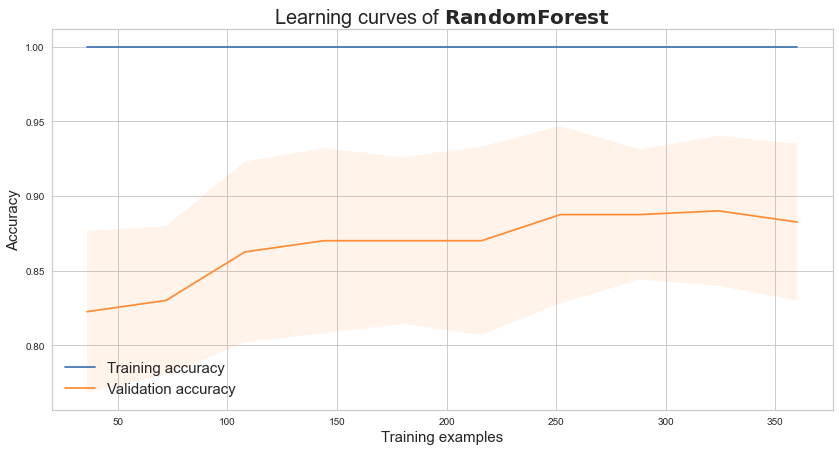

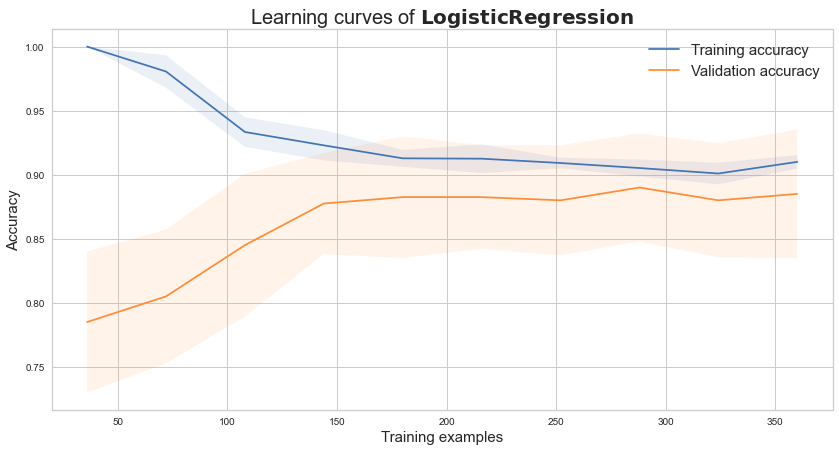

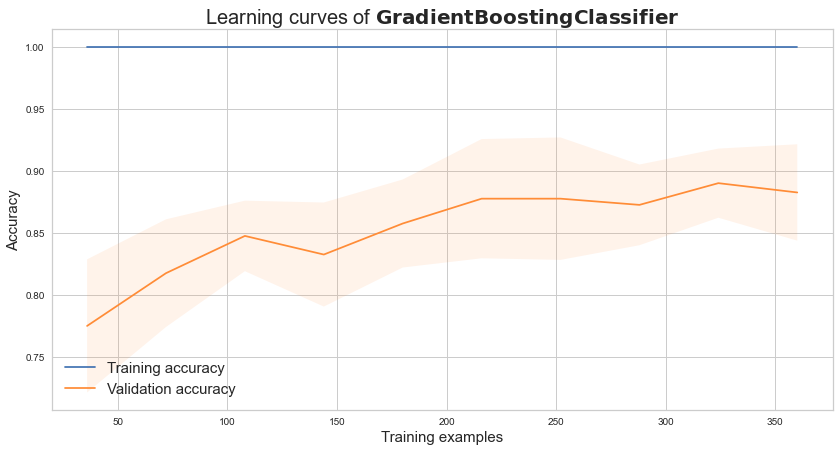

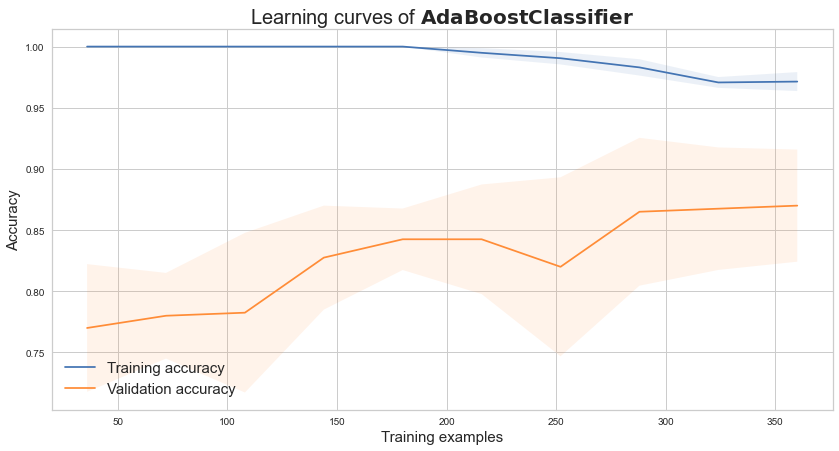

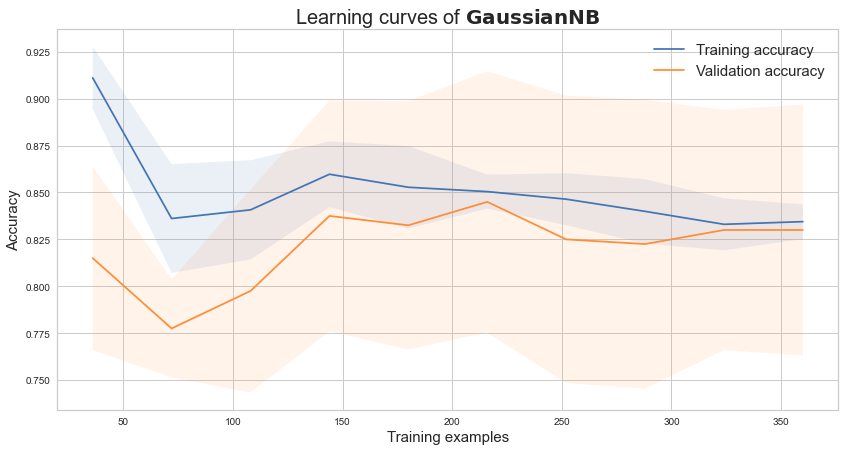

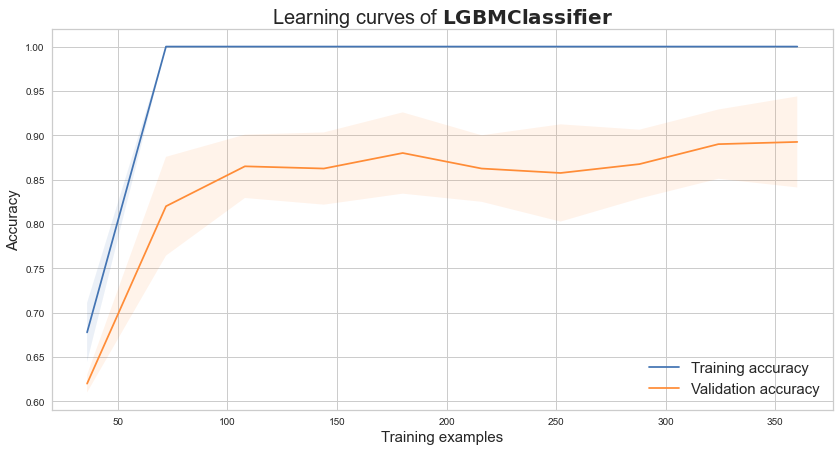

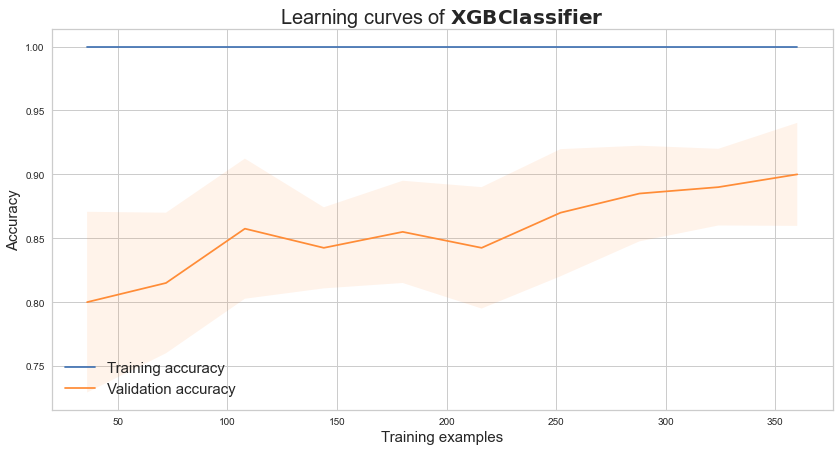

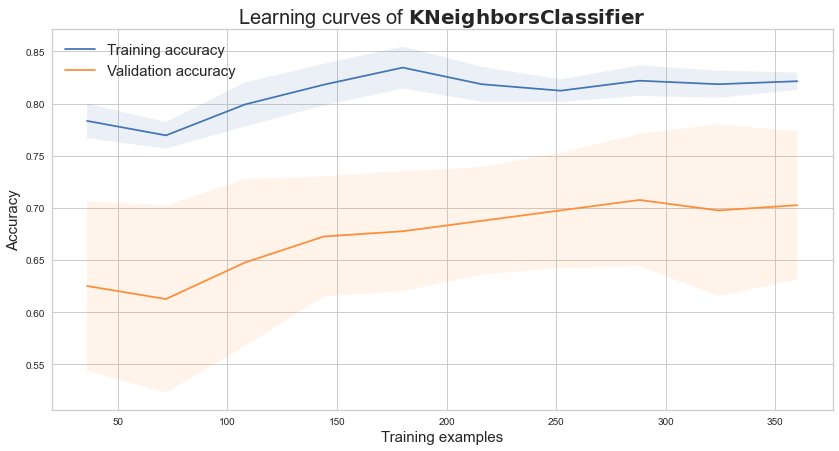

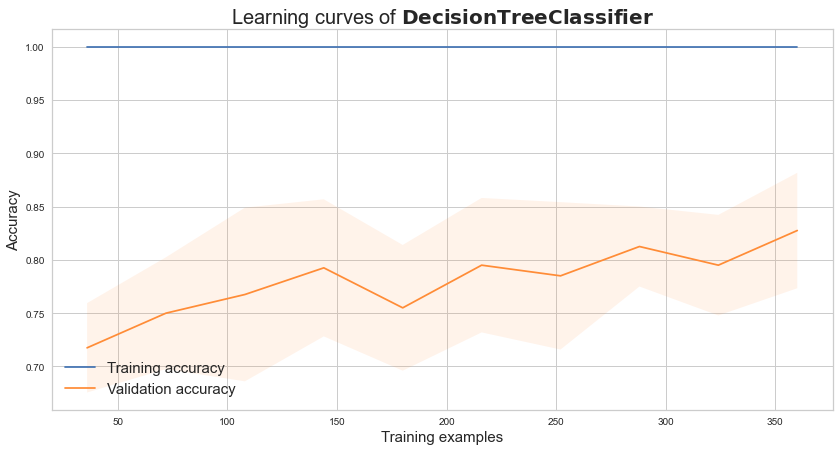

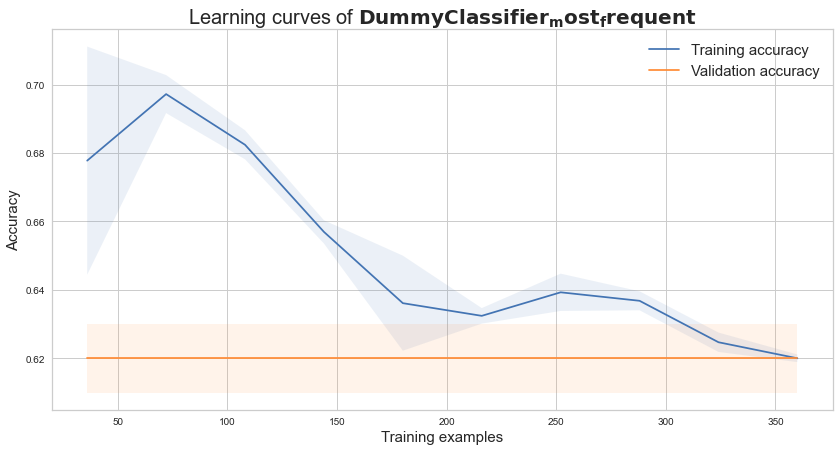

In [124]:
for name, model in models: 
    viz_learning_curve(name,model, X_train, y_train)

In [125]:
# With SMOTE
smote_performances.loc[smote_performances['Performance']
                       == 'Test'].sort_values(by='Accuracy',ascending=False)

,Model,Runtime,Performance,AUC,TP,FP,FN,TN,Precision,Recall,Accuracy
11,LGBMClassifier,0.0,Test,0.941324,54,4,3,59,0.941757,0.941667,0.941667
1,Random Forest,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
3,Logistic Regression,0.0,Test,0.925195,54,4,5,57,0.925160,0.925000,0.925000
5,Gradient Boosting Classifier,0.0,Test,0.916574,53,5,5,57,0.916667,0.916667,0.916667
13,XGBClassifier,0.0,Test,0.916574,53,5,5,57,0.916667,0.916667,0.916667
7,AdaBoostClassifier,0.0,Test,0.900445,53,5,7,55,0.900556,0.900000,0.900000
9,GaussianNB,0.0,Test,0.864850,47,11,5,57,0.869947,0.866667,0.866667
17,DecisionTreeClassifier,0.0,Test,0.847608,45,13,5,57,0.855714,0.850000,0.850000
15,KNeighborsClassifier,0.0,Test,0.761123,49,9,20,42,0.768727,0.758333,0.758333
19,DummyClassifier_most_frequent,0.0,Test,0.500000,58,0,62,0,0.233611,0.483333,0.483333



read more: https://articles.bnomial.com/overfitting-underfitting-learning-curves

### Comparing Classifiers
<u>**Answer**</u> Among the classifiers evaluated, **Logistic Regression** demonstrates the best performance. However, there is a slight gap between the accuracy of the model. This **suggests** that **adding** more **training samples** can further enhance the model's performance and reduce the gap.

**Overall**, the **Logistic Regression** model shows good generalization ability, indicating its effectiveness in making accurate predictions on unseen data.

In [130]:
# SMOTE (X_resampled, y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    random_state=42,
                                                    test_size=0.2)

## Hyperparameters Tuning

### 1. RandomForestClassifier
#### Hyperparameter
- **1. `n_estimator`** is **number** of **trees** in the forest.
    - **Objective**:  **reduce** the **variance** of the model. By increasing the number of trees in the forest, the model becomes **less** sensitive to **noise** and **outliers** in the data
- **2. `criterion`** used to evaluate the quality of a split when building the decision trees within the random forest.
    - **Objective**: **prevent** **`overfitting`**
- **3. `max_depth`** is maximum depth of the tree
    - **Objective**: improve the model's accuracy and prevent **`overfitting`**, **optimal** balance between **`bias`** and **`variance`**.
    - **Condition**
        - If the **`max_depth`** is too **large**,
            - Model will be more complex and will fit the training data very well, but they may not generalize well to new, unseen data (**`overfitting`**).
        - If the **`max_depth`** is too **small**,
            - The result may **`underfitting`**.
- **4. `min_samples_split`** is minimum number of samples required to split an internal node
    - **Objective**: **controls** the minimum number of samples required to split an internal node. **Increasing** this parameter can help **prevent** **`overfitting`**. 
- **5. `min_samples_leaf`** is minimum number of samples required to be at a leaf node (**min_samples_leaf**)
    - **Objective**: **controls** the minimum number of samples required to be at a leaf node. **Increasing** this parameter can help **prevent `overfitting`**.
- **6. `max_features`** is maximum number of features to consider when making a split (max_features)
    - **Objective**: **controls** the number of features to consider when making a split. A **lower value** **can** increase **`model generalization`**, **but** may also **`reduce`** model performance.
    

In [131]:
param_grid_rf = {
    'n_estimators': [1,2,4,8,16,32,64,128],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
    }

In [132]:
rf = RandomForestClassifier()

In [133]:
%%time
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5,
                           return_train_score=True,
                           )
grid_search_rf.fit(X_train, y_train)

CPU times: total: 57.8 s
Wall time: 57.9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128]},
             return_train_score=True)

In [134]:
print('Random Forest')
print('Best parameters:', grid_search_rf.best_params_)
print('Best score:', grid_search_rf.best_score_)
rf_result = pd.DataFrame(grid_search_rf.cv_results_)

Random Forest
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 128}
Best score: 0.9083333333333332


####  Feature importance from Random Forrest Classifier

In [159]:
rf_best_parm = grid_search_rf.best_estimator_

In [160]:
feature_importances = pd.DataFrame(rf_best_parm.feature_importances_,
                                   index=X.columns,
                                   columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Tenderness in right lower quadrant,0.144212
Pediatric appendicitis score (PAS),0.099928
Peritonitis/abdominal guarding,0.079340
Alvarado Score (AS),0.069345
age,0.065133
alcohol,0.063623
smoking,0.056421
Dysuria,0.047466
Neutrophil,0.043270
Lymphocytes,0.031945


### 2. LogisticRegression
#### Hyperparameter
1. **penalty**
    - ***L1*** regularization 
        - *****Lasso Regression (L1 Regularization):*****
        - Adds a penalty
        - **`Objective`**: regularization to avoid overfitting, **minimize** the **sum of squared errors**, L1 penalty is useful when you have a large number of features and want to reduce the number of features in the model.
    - ***L2*** penalty 
        - **Ridge Regression (L2 Regularization):**
        - Adds a regularization
        - **`Objective`**: regularization to avoid overfitting. less impact of important features
            
    - ***Elasticnet***
        - ****Elastic-Net Regression Regularization:****
        - combination of both L1 and L2 

2. **C**
    - **`Objective`**: 
        - **controls** the degree of **regularization** applied to the model. Regularization is a technique used to **prevent** **`overfitting`** by adding a **penalty** term to the **loss function**.
        - **controls** the strength of this penalty and therefore the **trade-off** between **fitting** the training data well and **`generalizing`** to new data.
3. **solver**
    - **`Objective`**: **minimizes** the **`cost function`**
    - **newton-cg** for small datasets
    - **lbfgs** for datasets with many features
    - **liblinear** for small and large datasets, and if datasets has a lot of noise or outliers. 
    - **sag** and **saga**  number of samples is much larger than the number of features.

In [135]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear', 'saga']}

In [136]:
lr = LogisticRegression()

In [137]:
%%time
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5,
                              return_train_score=True,
                              )

grid_search_lr.fit(X_train, y_train)

CPU times: total: 4.41 s
Wall time: 4.46 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             return_train_score=True)

In [138]:
print('Logistic Regression')
print('Best parameters:', grid_search_lr.best_params_)
print('Best score:', grid_search_lr.best_score_)
lr_result = pd.DataFrame(grid_search_lr.cv_results_)

Logistic Regression
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9145833333333334


### 3. DecisionTreeClassifier
#### Hyperparameter
- **`criterion`**: The function to measure the quality of a split, either "gini" for Gini impurity or "entropy" for information gain.
- **`max_depth`**: The maximum depth of the tree. **`None`** means unlimited depth.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.
- **`max_features`**: The number of features to consider when looking for the best split.

In [145]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [146]:
dtc = DecisionTreeClassifier()

In [147]:
%%time
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5,
                              return_train_score=True,
                              )

grid_search_dtc.fit(X_train, y_train)

CPU times: total: 6.92 s
Wall time: 6.93 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [148]:
print('Decision Tree Classifier')
print('Best parameters:', grid_search_dtc.best_params_)
print('Best score:', grid_search_dtc.best_score_)
dtc_result = pd.DataFrame(grid_search_dtc.cv_results_)

Decision Tree Classifier
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.8625


####  Feature importance from Decision tree  Classifier

In [156]:
dtc_best_parm = grid_search_dtc.best_estimator_

In [158]:
feature_importances = pd.DataFrame(dtc_best_parm.feature_importances_,
                                   index=X.columns,
                                   columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Peritonitis/abdominal guarding,0.405081
alcohol,0.178517
age,0.113446
smoking,0.090777
Tenderness in right lower quadrant,0.065848
sex,0.047086
Rebound tenderness,0.023305
RBC,0.023129
height,0.016344
Urine Specific gravity,0.015965


### 4. GradientBoostingClassifier
#### Hyperparameter
1. **`n_estimators`**: The number of decision trees to include in the ensemble. Increasing this parameter can 
    - **Objective**: **`improve`** **performance**, but also **`increases`** **training time** and **memory** requirements.

2. **`learning_rate`**: is step size at which the algorithm shrinks the contribution of each tree. **Smaller** learning rates typically result in **better** **performance** but require more trees to be included in the ensemble.
    - **Objective**: Lower learning_rate could improves the generalization ability
3. **`max_depth`**: The maximum depth of each decision tree. Increasing this parameter can result in **better performance**, **`but`** also **increases** the **risk** of **`overfitting`**.
4. **`subsample`**: The fraction of samples to use for fitting each individual tree. **Smaller** subsample sizes can **`reduce`** **`overfitting`** **`but`** may also **reduce** **performance**.
5. **`min_samples_split`**: The minimum number of samples required to split a node. Increasing this parameter can **`reduce`** **`overfitting`** **`but`** may also **reduce** **performance**.
6. **`max_features`**: The maximum number of features to consider when looking for the best split. Reducing this parameter can **help** **`prevent`** **`overfitting`** **`but`** may also **`reduce`** **`performance`**.

In [139]:
param_grid_gbc = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [1, 50, 150],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

In [140]:
gbc = GradientBoostingClassifier()

In [141]:
%%time
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5,return_train_score=True,)
grid_search_gbc.fit(X_train, y_train)

CPU times: total: 3min 59s
Wall time: 4min


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 50, 150]},
             return_train_score=True)

In [ ]:
print('Gradient Boosting Classifier')
print('Best parameters:', grid_search_gbc.best_params_)
print('Best score:', grid_search_gbc.best_score_)
gbc_result = pd.DataFrame(grid_search_gbc.cv_results_)

Gradient Boosting Classifier
Best parameters: {'learning_rate': 1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 150}
Best score: 0.9800000000000001


### 4. AdaBoostClassifier
#### Hyperparameter
1. **n_estimators**:
    - **Objective**: The number of weak learners (base estimators) to be used in the ensemble.
    - Determines the number of iterations at which boosting is terminated.
    - Example: **`n_estimators = [50, 100, 200]`**
2. **learning_rate**:
    - **Objective**: Controls the contribution of each weak learner to the final prediction.
    - A lower learning rate makes the model more robust by shrinking the contribution of each weak learner.
    - Example: **`learning_rate = [0.1, 0.01, 0.001]`**
3. **base_estimator**:
    - **Objective**: The base estimator (weak learner) to be used in the ensemble.
    - Specifies the algorithm used for the weak learners. It can be any classifier that supports sample weighting.
    - Example: **`base_estimator = [DecisionTreeClassifier(max_depth=1), LogisticRegression()]`**

In [149]:
param_grid_abc = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'base_estimator': [
        DecisionTreeClassifier(**grid_search_dtc.best_params_),
        LogisticRegression(**grid_search_lr.best_params_)
    ]
}

In [150]:
abc = AdaBoostClassifier()

In [151]:
%%time
grid_search_abc = GridSearchCV(
    abc, param_grid_abc, cv=5, return_train_score=True,)
grid_search_abc.fit(X_train, y_train)

CPU times: total: 4min 6s
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5,
                                                                   max_features='sqrt',
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=5),
                                            LogisticRegression(C=1)],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [152]:
print('AdaBoost Classifier')
print('Best parameters:', grid_search_abc.best_params_)
print('Best score:', grid_search_abc.best_score_)
abc_result = pd.DataFrame(grid_search_abc.cv_results_)

AdaBoost Classifier
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5), 'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.9125


### 5. GaussianNB 
No significant hyperparameters to tune.

### 6. LGBMClassifier
#### Hyperparameter
- **`num_leaves`**: Number of leaves in each decision tree.
- **`learning_rate`**: Learning rate or shrinkage parameter.
- **`max_depth`**: Maximum depth of each decision tree.
- **`min_child_samples`**: Minimum number of samples required to form a new leaf node.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate for boosting
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    # Subsample ratio of columns when constructing each tree
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
    # Balancing of positive and negative weights
    'scale_pos_weight': [200/300],
    'random_state': [42]  # Random state for reproducibility
}

In [ ]:
lgbmc = LGBMClassifier()


In [ ]:
%%time
grid_search_lgbmc = GridSearchCV(
    lgbmc, grid_search_lgbmc, cv=5, return_train_score=True,)
grid_search_lgbmc.fit(X_train, y_train)


CPU times: total: 4min 6s
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5,
                                                                   max_features='sqrt',
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=5),
                                            LogisticRegression(C=1)],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
print('LGBM Classifier')
print('Best parameters:', grid_search_lgbmc.best_params_)
print('Best score:', grid_search_lgbmc.best_score_)
lgbmc_result = pd.DataFrame(grid_search_lgbmc.cv_results_)


AdaBoost Classifier
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5), 'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.9125


### 7. XGBClassifier
#### Hyperparameter

In [ ]:
param_grid_xgbc = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate for boosting
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    # Subsample ratio of columns when constructing each tree
    'colsample_bytree': [0.8, 1.0],
    # Minimum loss reduction required to make a further partition on a leaf node
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
    # Balancing of positive and negative weights
    'scale_pos_weight': [200/300],
    'random_state': [42]  # Random state for reproducibility
}

In [ ]:
xgbc = XGBClassifier()

In [ ]:
%%time
grid_search_xgbc = GridSearchCV(
    xgbc, param_grid_xgbc, cv=5, return_train_score=True,)
grid_search_xgbc.fit(X_train, y_train)


CPU times: total: 4min 6s
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5,
                                                                   max_features='sqrt',
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=5),
                                            LogisticRegression(C=1)],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
print('XGB Classifier')
print('Best parameters:', grid_search_xgbc.best_params_)
print('Best score:', grid_search_xgbc.best_score_)
xgbc_result = pd.DataFrame(grid_search_xgbc.cv_results_)


AdaBoost Classifier
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5), 'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.9125


### 8. KNeighborsClassifier
#### Hyperparameter

In [ ]:
param_grid_knc = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    # Algorithm used to compute the nearest neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],  # Leaf size passed to BallTree or KDTree
    # Parameter for the Minkowski metric: 1 for Manhattan distance, 2 for Euclidean distance
    'p': [1, 2]
}

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
%%time
grid_search_knc = GridSearchCV(
    knc, grid_search_knc, cv=5, return_train_score=True,)
grid_search_knc.fit(X_train, y_train)


CPU times: total: 4min 6s
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5,
                                                                   max_features='sqrt',
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=5),
                                            LogisticRegression(C=1)],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
print('KNeighbors Classifier')
print('Best parameters:', grid_search_knc.best_params_)
print('Best score:', grid_search_knc.best_score_)
knc_result = pd.DataFrame(grid_search_knc.cv_results_)

AdaBoost Classifier
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5), 'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.9125


### 10. DummyClassifier
#### Hyperparameter

In [ ]:
param_grid_dummyc = {
    'strategy': ['stratified', 'most_frequent', 'uniform']
}

In [ ]:
dummyc = DummyClassifier()

In [ ]:
%%time
grid_search_dummyc = GridSearchCV(
    dummyc, grid_search_dummyc, cv=5, return_train_score=True,)
grid_search_dummyc.fit(X_train, y_train)


CPU times: total: 4min 6s
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5,
                                                                   max_features='sqrt',
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=5),
                                            LogisticRegression(C=1)],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
print('Dummy Classifier')
print('Best parameters:', grid_search_dummyc.best_params_)
print('Best score:', grid_search_dummyc.best_score_)
dummyc_result = pd.DataFrame(grid_search_dummyc.cv_results_)


AdaBoost Classifier
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5), 'learning_rate': 0.01, 'n_estimators': 50}
Best score: 0.9125


In [ ]:
tuned_rf = grid_search_rf.best_estimator_
tuned_lr = grid_search_lr.best_estimator_
tuned_gbc = grid_search_gbc.best_estimator_
tuned_abc = grid_search_abc.best_estimator_
tuned_dtc = grid_search_dtc.best_estimator_
tuned_lgbmc = grid_search_lgbmc.best_estimator_
tuned_xgbc = grid_search_xgbc.best_estimator_
tuned_knc = grid_search_knc.best_estimator_
tuned_dummyc = grid_search_dummyc.best_estimator_
gnb = GaussianNB()

tuned_models = [('Random Forest', tuned_rf), ('Logistic Regression', tuned_lr),
                ('Gradient Boosting Classifier', tuned_gbc),
                ('AdaBoostClassifier',tuned_abc), ('GaussianNB', gnb),
                ('LGBMClassifier', tuned_lgbmc), ('XGBClassifier', tuned_xgbc),
                ('KNeighborsClassifier',
                 tuned_knc), ('DecisionTreeClassifier', tuned_dtc),
                ('DummyClassifier_most_frequent', tuned_dummyc)]

In [ ]:
tuned_performances = modeling(
    tuned_models, X_train, X_test, y_train, y_test)
tuned_performances

In [ ]:
# save models
for name, model in tuned_models:
    file_name = name.replace(' ', '_')
    joblib.dump(model, f'Model/model_{file_name}.pkl')

#### Hyperparameter Function easy to use

In [ ]:
def hyperparameter_tuning(models, X_train, X_test, y_train, y_test):
    l_performances = []

    for name, model in models:
        start_time = time.time()
        # grid search
        grid_search = GridSearchCV(
                    model, grid_search, cv=5, return_train_score=True,)
        grid_search.fit(X_train, y_train)
        print(name)
        print('Best parameters:', grid_search.best_params_)
        print('Best score:', grid_search.best_score_)
        result_of_grid = pd.DataFrame(grid_search.cv_results_)
        result_of_grid[name] = name
        file_name = name.replace(' ', '_')
        result_of_grid.to_csv(f'{file_name}.csv', index=False)
        
        joblib.dump(result_of_grid, f'Model/grid_search/grid_search_{file_name}.pkl')
        model_best_param = grid_search.best_estimator_
        joblib.dump(model_best_param, f'Model/model_{file_name}.pkl')

        for subset, subset_name, y_true in [(X_train, 'Train', y_train),
                                            (X_test, 'Test', y_test)]:
            y_pred = model.predict(subset)
            # Calculate ROC curve and AUC score
            fpr, tpr, thresholds = roc_curve(y_true, y_pred)
            auc_score = roc_auc_score(y_true, y_pred)
            # Classification Report
            report = classification_report(y_true, y_pred, output_dict=True)
            report_dict = json.loads(json.dumps(report))

            # Extract precision and recall from report_dict
            precision = report_dict['weighted avg']['precision']
            recall = report_dict['weighted avg']['recall']
            accuracy = report_dict['accuracy']

            # Confusion Matrix
            cm = confusion_matrix(y_true, y_pred)
            TP = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TN = cm[1][1]
            runtime = format(round((time.time() - start_time)/60, 2))
            # Dict
            my_dict = {'Model': name, 'Runtime': runtime, 'Performance': subset_name,
                       'AUC': auc_score, 'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
                       'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

            l_performances.append(my_dict)
        

    performances = pd.DataFrame(l_performances)
    return performances

In [ ]:
# Tunning all 
# %%time
# #
# rf = RandomForestClassifier()
# lr = LogisticRegression()
# gbc = GradientBoostingClassifier()
# abc = AdaBoostClassifier()
# gnb = GaussianNB()
# lgbmc = LGBMClassifier()
# xgbc = XGBClassifier()
# knc = KNeighborsClassifier(3)
# dtc = DecisionTreeClassifier()
# dummyc = DummyClassifier(strategy='most_frequent', random_state=0)

# models = [('Random Forest', rf), ('Logistic Regression', lr),
#           ('Gradient Boosting Classifier', gbc),
#           ('AdaBoostClassifier', abc), ('GaussianNB', gnb),
#           ('LGBMClassifier', lgbmc), ('XGBClassifier', xgbc),
#           ('KNeighborsClassifier', knc), ('DecisionTreeClassifier', dtc),
#           ('DummyClassifier_most_frequent', dummyc)]

# param_grid_rf = {'n_estimators': [1, 50, 100],
#                  'max_depth': [3, 5, 7],
#                  'min_samples_split': [2, 4, 6],
#                  'min_samples_leaf': [1, 2, 3]
#                  }

# param_grid_lr = {'C': [0.01, 0.1, 1, 10],
#                  'penalty': ['l1', 'l2'],
#                  'solver': ['lbfgs', 'liblinear', 'saga']}

# param_grid_gbc = {'learning_rate': [0.01, 0.1, 1],
#                   'n_estimators': [1, 50, 100],
#                   'max_depth': [3, 5, 7],
#                   'min_samples_split': [2, 4, 6],
#                   'min_samples_leaf': [1, 2, 3]}

# models = [('Random Forest', rf, param_grid_rf),
#           ('Logistic Regression', lr, param_grid_lr),
#           ('Gradient Boosting Classifier', gbc, param_grid_gbc)]

# for name, model, param_grid in models:
#     grid_search = GridSearchCV(model, param_grid, cv=5,
#                                return_train_score=True,)
#     grid_search.fit(X_train, y_train)
#     print(name)

#     print('Best parameters:', grid_search.best_params_)
#     print('Best score:', grid_search.best_score_)
#     file_name = name.replace(' ', '_')
#     joblib.dump(
#         grid_search, f'Model/Feature_Importance/gridSearch_{file_name}.pkl')
#     # Build model
#     viz_learning_curve(name, grid_search.best_estimator_, X_train, y_train)

## Learning curve

## Permutation Feature Importance
Obj: To identify how important each feature is for predicting the outcome.  In other words which feature degraded in all models when it was absent?
(Also) หา Features ที่มีผลต่อโมเดลในการทำนายมากที่สุด

## Re-Hyperparameters Tuning

# Prediction Function

# Deployment

# Reference project
# Researched By

Pisit Janthawee (Data Scientist)

Bachelor of science in Computer Science, Bangkok University

Bangkok, Bangkok City, Thailand

2023

--
# Contact
## Gmail
pisit.jant@gmail.com
## Portfolio
https://pisit-janthawee.mystrikingly.com/
## LinkedIn

## Github
https://github.com/Pisit-Janthawee

In [ ]:
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.subplot(2, 3, 2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.subplot(2, 3, 3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.subplot(2, 3, 4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.subplot(2, 3, 5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.subplot(2, 3, 6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d",
            cbar=False, annot_kws={"size": 24})

plt.show()

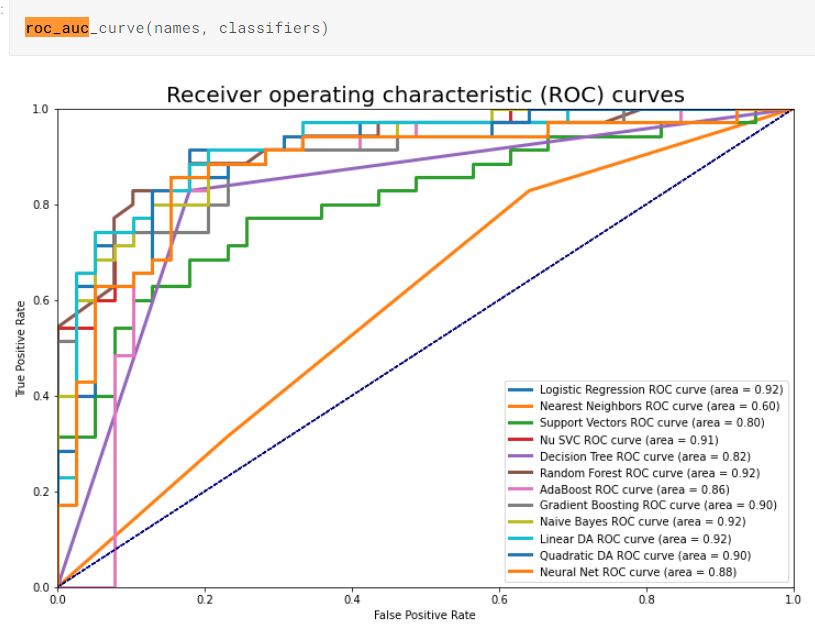

# Model Explainablity

2.3.1 Permutation importance


2.3.2 SHAP